# Titanic Survival DS, Prediction by Support Vector Machine

In [29]:
import pandas as pd
import numpy as nm
import matplotlib as plt
import warnings


import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline 

In [30]:
warnings.filterwarnings("ignore")

In [31]:
titan_ds = pd.read_csv("train.csv")
titan_ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
titan_ds.shape

(891, 12)

In [33]:
titan_ds.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
titan_ds.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [35]:
pd.value_counts(titan_ds['Survived'])

0    549
1    342
Name: Survived, dtype: int64

In [36]:
#replace the nans and nulls with median
median = round(titan_ds['Age'].median())
titan_ds['Age'] = titan_ds['Age'].fillna(value=median)
#Fill the cabin data in binary
titan_ds['Cabin'] = titan_ds["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
#Fill the Sex data in binary
titan_ds['Sex'] = titan_ds['Sex'].apply(lambda x : 0 if x=='male' else 1)
titan_ds['FamilySize']=titan_ds['SibSp'] + titan_ds['Parch'] + 1
#create a new column for 'is_Alone' and fill if travelled alone. 
titan_ds['Is_Alone'] =titan_ds['FamilySize']==1
titan_ds['Is_Alone'] = titan_ds['Is_Alone'].apply(lambda x: 1 if x==1 else 0)

In [37]:
#Drop not required variables
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Embarked']
titan_ds = titan_ds.drop(drop_elements, axis = 1)

In [38]:
pd.value_counts(titan_ds['Sex'])

0    577
1    314
Name: Sex, dtype: int64

In [39]:
print('missing values ',titan_ds.isna().sum())
print('missing values ',titan_ds.isnull().sum())

missing values  Survived      0
Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
FamilySize    0
Is_Alone      0
dtype: int64
missing values  Survived      0
Pclass        0
Sex           0
Age           0
Parch         0
Fare          0
FamilySize    0
Is_Alone      0
dtype: int64


In [40]:
titan_ds.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'FamilySize',
       'Is_Alone'],
      dtype='object')

### Why you should not travel Alone? Looks like there is 60% more chances of survival if you go with your family!

#### Survival percentage of lone travellers:

In [41]:
len(titan_ds[(titan_ds['Is_Alone'] == 1 ) & (titan_ds['Survived'] == 1)])/ len(titan_ds[(titan_ds['Is_Alone'] == 1 )])

0.30353817504655495

#### Survival percentage of travel with partners:

In [42]:
len(titan_ds[(titan_ds['Is_Alone'] != 1 ) & (titan_ds['Survived'] == 1) ])/ len(titan_ds[(titan_ds['Is_Alone'] != 1 )])

0.5056497175141242

### Being Female, does they have more chance of survival? Looks like yes.

In [16]:
len(titan_ds[ (titan_ds['Survived'] == 1) & (titan_ds['Sex'] == 1)])/ len(titan_ds[ (titan_ds['Sex'] == 1)])

0.7420382165605095

In [17]:
len(titan_ds[(titan_ds['Is_Alone'] == 1 ) & (titan_ds['Survived'] == 1) & (titan_ds['Sex'] == 1)])/ len(titan_ds[(titan_ds['Sex'] == 1) & (titan_ds['Is_Alone'] == 1 )])

0.7857142857142857

In [18]:
len(titan_ds[(titan_ds['Is_Alone'] != 1 ) & (titan_ds['Survived'] == 1) & (titan_ds['Sex'] == 1)])/ len(titan_ds[(titan_ds['Sex'] == 1) & (titan_ds['Is_Alone'] != 1 )])

0.7127659574468085

#### Worst victims are among lone Male passengers

In [47]:
##We could imagine women are 
len(titan_ds[(titan_ds['Is_Alone'] != 1 ) & (titan_ds['Survived'] == 1) & (titan_ds['Sex'] == 0)])/ len(titan_ds[(titan_ds['Sex'] == 0) & (titan_ds['Is_Alone'] != 1 )])

0.2710843373493976

In [48]:
##We could imagine women are 
len(titan_ds[(titan_ds['Is_Alone'] == 1 ) & (titan_ds['Survived'] == 1) & (titan_ds['Sex'] == 0)])/ len(titan_ds[(titan_ds['Sex'] == 0) & (titan_ds['Is_Alone'] == 1 )])

0.15571776155717762

# Some Graphocs now to proove the above numbers. 
### The Box plot reveals Being Male is not so lucky one in Titanic. 
### It does not matter even if you have a big family some times. 

[[Text(0, 0, 'Male'), Text(0, 0, 'Female')]]

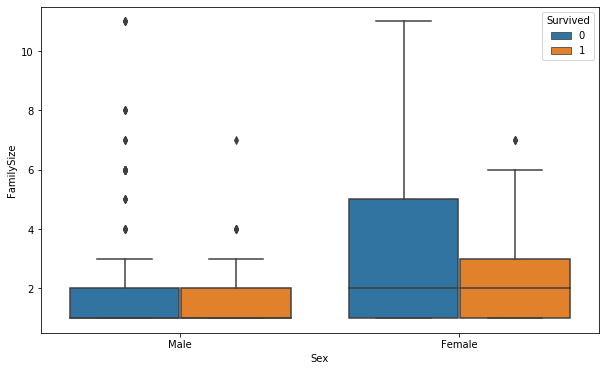

In [49]:
plt.figure(figsize=(10,6))
ax=sns.boxplot('Sex','FamilySize',data=titan_ds,hue='Survived')
ax.set(xticklabels=['Male','Female'])


<Figure size 720x432 with 0 Axes>

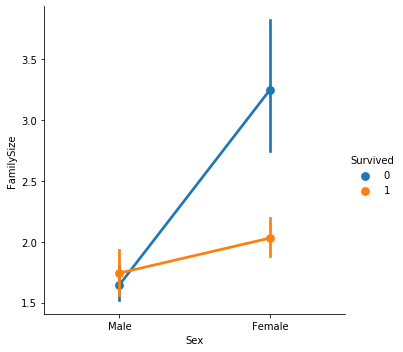

In [50]:
plt.figure(figsize=(10,6))
ax=sns.factorplot('Sex','FamilySize',data=titan_ds,hue='Survived')
ax.set(xticklabels=['Male','Female'])

### Does Age also played a factor of survival? Looks like to some extend. Survival rate is grim beyond 65s and beyond.

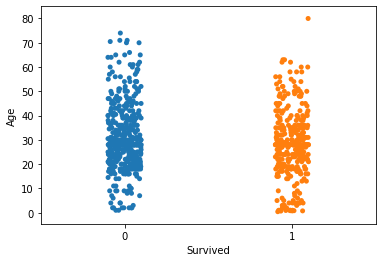

In [51]:
sns.stripplot(titan_ds['Survived'],titan_ds['Age'])

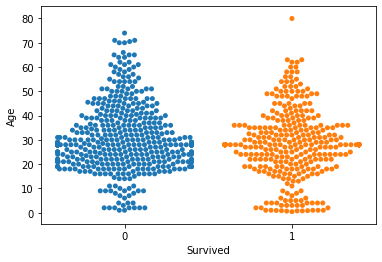

In [52]:
sns.swarmplot(titan_ds['Survived'],titan_ds['Age'])

### Let's verify the above throough correlation matrix. Does ticket price played any role? Looks like NO.

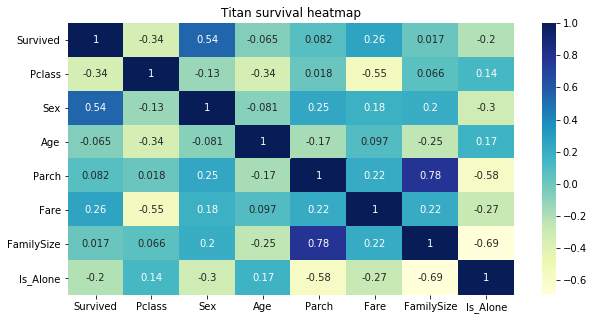

In [71]:
plt.figure(figsize=(10,5))
sns.heatmap(titan_ds.corr(), cmap='YlGnBu', annot=True)
plt.title("Titan survival heatmap")
plt.show()

### Time to Train our SVM model.  Linear Kernel with default c and default gamma

In [69]:
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
import numpy as np


#Get x and Y
X_train,y_train = np.array(titan_ds)[ :, 2:9], np.array(titan_ds.Survived)[:]

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Check the accuracy on the training set.

In [73]:
print(svc_model.score(X_train, y_train))

0.792368125701459


In [ ]:
####Same cleanup like train data. I am lazy to not write a funcion :)

In [74]:
titan_test_ds= pd.read_csv("test.csv")
passenger_ids= titan_test_ds['PassengerId']
passenger_ids = passenger_ids.dropna()

#replace the nans and nulls with median
median = round(titan_test_ds['Age'].median())
titan_test_ds['Age'] = titan_test_ds['Age'].fillna(value=median)

titan_test_ds['Fare'] = titan_test_ds['Fare'].fillna(value=median)
#Fill the cabin data in binary
titan_test_ds['Cabin'] = titan_test_ds["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
#Fill the Sex data in binary
titan_test_ds['Sex'] = titan_test_ds['Sex'].apply(lambda x : 0 if x=='male' else 1)
titan_test_ds['FamilySize']=titan_test_ds['SibSp'] + titan_test_ds['Parch'] + 1
#create a new column for 'is_Alone' and fill if travelled alone. 
titan_test_ds['Is_Alone'] =titan_test_ds['FamilySize']==1
titan_test_ds['Is_Alone'] = titan_test_ds['Is_Alone'].apply(lambda x: 1 if x==1 else 0)
#Drop not required variables
drop_elements = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp','Embarked']
titan_test_ds = titan_test_ds.drop(drop_elements, axis = 1)

### Time to Test our SVM model and predict the target variable.

In [75]:
predictions = svc_model.predict(titan_test_ds.iloc[:,1:])
output = pd.DataFrame({'PassengerId': passenger_ids, 'Survived': predictions})
output.to_csv('titanic_prediction.csv', index=False)

# Verdict
### Yes our predicted score is 78% seems a good try!
## Take Away:
### Using Support Vector Machine as a regression is good if you have multi colinearity dependent variables. As you can see there are features such age and sex. Where I felt like a conditional probability which increases chances of survival. So if you have features with multi colinearity and sparse data, Better to go with SVM. This is neverthless my first Kaggle submission. I've to improve by using better algos such as Random Forest or Ensamble techniques.